<a href="https://colab.research.google.com/github/ManjeetOjha/Hill_and_Valley_Prediction/blob/main/Hill_and_Valley_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [197]:
data=pd.read_csv('Hill Valley Dataset.csv')

In [198]:
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0
5,3.37,3.35,3.51,3.35,3.37,3.36,3.29,3.34,3.38,3.34,...,3.31,3.31,3.47,3.30,3.48,3.43,3.38,3.31,3.48,0
6,23.02,23.14,23.69,21.89,22.09,24.96,25.13,21.36,23.68,21.50,...,23.51,24.86,22.69,22.60,24.68,21.62,24.64,20.94,23.01,0
7,1488.34,1531.87,1371.16,1486.59,1386.43,1570.24,1370.25,1554.82,1510.77,1387.45,...,1472.70,1375.69,1427.02,1526.99,1507.12,1420.94,1541.97,1462.02,1452.74,0
8,25.97,25.58,25.06,25.34,25.96,25.54,26.34,25.02,26.30,24.80,...,24.83,24.97,25.32,25.23,24.88,25.20,25.89,25.80,25.18,1
9,7354.68,7451.58,6605.84,7479.67,6974.47,7562.17,7836.13,7694.08,6538.31,6981.51,...,7745.83,6825.93,6609.95,8057.45,6999.11,7639.73,6974.83,7911.31,7289.52,1


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [200]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


In [201]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V97      0
V98      0
V99      0
V100     0
Class    0
Length: 101, dtype: int64

In [202]:
data.columns



Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [203]:
data.shape

(1212, 101)

In [204]:
data['Class'].value_counts()

0    606
1    606
Name: Class, dtype: int64

In [205]:
data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


In [206]:
Y= data['Class']

In [207]:
Y.shape

(1212,)

In [208]:
X=data.drop('Class', axis =1)

In [209]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,37.57,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.71,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,69384.71,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,47653.60,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.52,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.89,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,47.45,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,10413.41,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,33.18,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82


In [210]:
Y

0       0
1       1
2       1
3       0
4       0
       ..
1207    1
1208    0
1209    1
1210    1
1211    0
Name: Class, Length: 1212, dtype: int64

Text(0.5, 1.0, 'Valley')

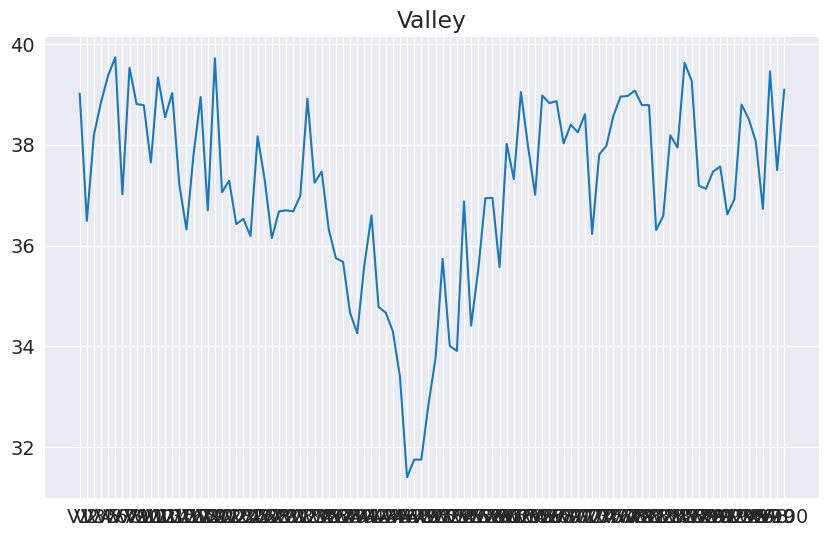

In [211]:
plt.plot(X.iloc[0,:])
plt.title('Valley')


Text(0.5, 1.0, 'Hill')

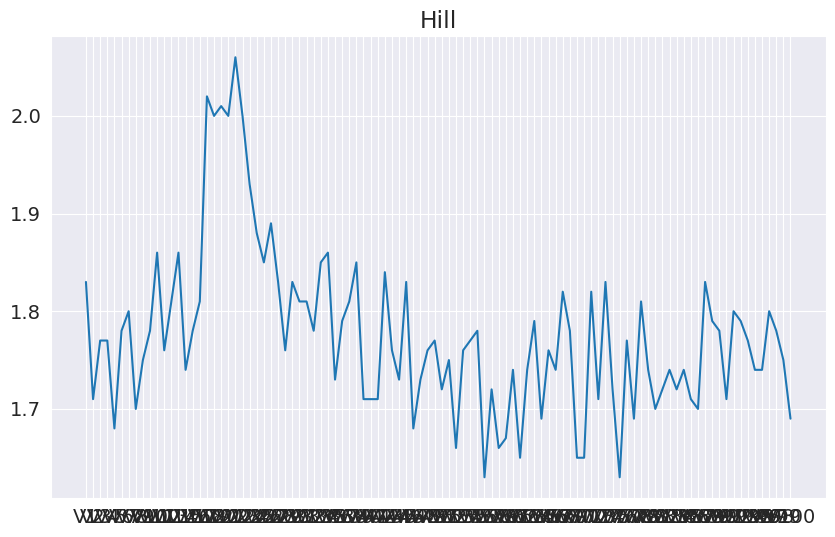

In [212]:
plt.plot(X.iloc[1,:])
plt.title('Hill')

In [213]:
from sklearn.preprocessing import MinMaxScaler

In [214]:
Mm = MinMaxScaler()

In [215]:
X =Mm.fit_transform(X)

In [216]:
X

array([[3.23410461e-04, 3.26826856e-04, 3.13785122e-04, ...,
        3.31526542e-04, 3.22973439e-04, 3.33616018e-04],
       [7.72450182e-06, 7.43831843e-06, 7.72911145e-06, ...,
        7.90166888e-06, 7.41453098e-06, 6.98489438e-06],
       [5.78716027e-01, 6.07348067e-01, 6.13128820e-01, ...,
        6.10342597e-01, 5.94957501e-01, 6.54129683e-01],
       ...,
       [8.62404977e-02, 8.30862924e-02, 7.55612217e-02, ...,
        8.90258702e-02, 7.94121866e-02, 8.12420050e-02],
       [2.87674029e-04, 3.13786841e-04, 2.86733232e-04, ...,
        2.71662812e-04, 2.81752177e-04, 2.96246833e-04],
       [7.20544077e-02, 7.04535483e-02, 7.67138675e-02, ...,
        7.45382462e-02, 7.40429187e-02, 7.60647140e-02]])

In [217]:
X.shape

(1212, 100)

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size= 0.25, stratify=Y, random_state=2556)

In [220]:
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((909, 100), (303, 100), (909,), (303,))

In [221]:
from sklearn.linear_model import LogisticRegression

In [222]:
Lr = LogisticRegression()

In [223]:
Lr.fit(X_train,Y_train)

LogisticRegression()

In [224]:
Y_pred = Lr.predict(X_test)

In [225]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [226]:
Lr.predict_proba(X_test)

array([[0.51304374, 0.48695626],
       [0.51254532, 0.48745468],
       [0.51257685, 0.48742315],
       [0.51349809, 0.48650191],
       [0.4608554 , 0.5391446 ],
       [0.51262519, 0.48737481],
       [0.51306365, 0.48693635],
       [0.51264097, 0.48735903],
       [0.50500015, 0.49499985],
       [0.51289539, 0.48710461],
       [0.51282231, 0.48717769],
       [0.51305682, 0.48694318],
       [0.50878343, 0.49121657],
       [0.45997806, 0.54002194],
       [0.51306612, 0.48693388],
       [0.43159622, 0.56840378],
       [0.51306579, 0.48693421],
       [0.51290583, 0.48709417],
       [0.51306863, 0.48693137],
       [0.51251415, 0.48748585],
       [0.51294793, 0.48705207],
       [0.50787437, 0.49212563],
       [0.50736934, 0.49263066],
       [0.51307725, 0.48692275],
       [0.43383488, 0.56616512],
       [0.50237033, 0.49762967],
       [0.51306078, 0.48693922],
       [0.51292186, 0.48707814],
       [0.51294706, 0.48705294],
       [0.51299177, 0.48700823],
       [0.

In [227]:
from sklearn.metrics import confusion_matrix, classification_report

In [228]:
print(confusion_matrix(Y_test,Y_pred))

[[127  25]
 [118  33]]


In [229]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.52      0.84      0.64       152
           1       0.57      0.22      0.32       151

    accuracy                           0.53       303
   macro avg       0.54      0.53      0.48       303
weighted avg       0.54      0.53      0.48       303



In [230]:
X_new = data.sample(3)

In [231]:
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
540,27.61,29.09,27.43,29.03,28.39,28.86,29.24,29.26,28.65,29.13,...,28.61,28.31,28.52,27.48,28.56,28.30,29.28,28.36,29.04,1
189,973.53,1053.69,890.17,913.15,1000.75,909.64,868.13,743.99,673.99,727.92,...,1059.14,997.02,1083.06,1056.81,981.36,1054.97,966.76,1098.89,991.40,0
635,13804.12,15532.95,15268.60,14762.40,13313.29,15847.12,13535.04,15839.01,14455.53,14272.11,...,14479.30,15282.26,14053.24,13161.54,15377.07,15530.32,14975.91,12773.01,14860.48,0


In [232]:
X_new.shape

(3, 101)

In [233]:
X_new = X_new.drop('Class', axis=1)

In [234]:
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
540,27.61,29.09,27.43,29.03,28.39,28.86,29.24,29.26,28.65,29.13,...,27.57,28.61,28.31,28.52,27.48,28.56,28.30,29.28,28.36,29.04
189,973.53,1053.69,890.17,913.15,1000.75,909.64,868.13,743.99,673.99,727.92,...,1041.97,1059.14,997.02,1083.06,1056.81,981.36,1054.97,966.76,1098.89,991.40
635,13804.12,15532.95,15268.60,14762.40,13313.29,15847.12,13535.04,15839.01,14455.53,14272.11,...,14083.51,14479.30,15282.26,14053.24,13161.54,15377.07,15530.32,14975.91,12773.01,14860.48


In [235]:
X_new = Mm.fit_transform(X_new)

In [236]:
Y_pred_new =Lr.predict(X_new)

In [237]:
Y_pred_new

array([0, 1, 1])

In [238]:
Lr.predict_proba(X_new)

array([[0.51306793, 0.48693207],
       [0.45150743, 0.54849257],
       [0.26494608, 0.73505392]])